In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4. * x + 3 + np.random.normal(0, 3, size=m)

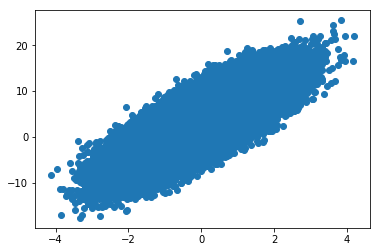

In [8]:
plt.scatter(x, y)
plt.show()

In [0]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    
    return res * 2 / len(X_b)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break

        cur_iter += 1

    return theta

# 小批量随机梯度下降

In [0]:
def mini_batch_gredient_descent(X_b, y, initial_theta, n_iters=1e4, batch_size=10):
    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    # 构造一个索引并打乱
    indices = np.arange(X_b.shape[0])
    np.random.shuffle(indices)
    cur_iter = 1
    for idx in range(0, len(indices) - batch_size + 1, batch_size):
        # 按照batch_size 取索引
        mini_batch_index = indices[idx: idx + batch_size]
        mini_X_b = X_b[mini_batch_index]
        mini_y = y[mini_batch_index]
        gradient = dJ(theta, mini_X_b, mini_y)
        theta = theta - learning_rate(cur_iter) * gradient
        if cur_iter > n_iters:
            break
        cur_iter += 1
    return theta

In [11]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = mini_batch_gredient_descent(X_b, y, initial_theta, n_iters=m//3)

CPU times: user 208 ms, sys: 2.98 ms, total: 211 ms
Wall time: 212 ms


In [12]:
theta

array([3.00238238, 3.98489425])

# 动量

In [0]:
def mini_batch_gredient_descent_momentum(X_b, y, initial_theta, n_iters=1e4, batch_size=10, gamma=0.9):
    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    pre_vt = .0
    # 构造一个索引并打乱
    indices = np.arange(X_b.shape[0])
    np.random.shuffle(indices)
    cur_iter = 1
    for idx in range(0, len(indices) - batch_size + 1, batch_size):
        # 按照batch_size 取索引
        mini_batch_index = indices[idx: idx + batch_size]
        mini_X_b = X_b[mini_batch_index]
        mini_y = y[mini_batch_index]
        gradient = dJ(theta, mini_X_b, mini_y)
        # 加入动量
        vt = learning_rate(cur_iter) * gradient + gamma * pre_vt
        pre_vt = vt
        theta = theta - vt
        if cur_iter > n_iters:
            break
        cur_iter += 1
    return theta

In [14]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = mini_batch_gredient_descent(X_b, y, initial_theta, n_iters=m//3)

CPU times: user 208 ms, sys: 4.45 ms, total: 213 ms
Wall time: 213 ms


In [15]:
theta

array([2.98156017, 4.01902706])